
# Prediction on Medical Appointment Absence

## Table of Contents
<ul>
<li><a href="#intro">Introduction</a></li>
<li><a href="#wrangling">Data Wrangling</a></li>
<li><a href="#eda">Exploratory Data Analysis</a></li>
<li><a href="#conclusions">Conclusions</a></li>
</ul>

<a id='intro'></a>
## Introduction

In this report, a dataset comprising the characters of patients and their medical appointments records is analyzed. 

Specifically, I'm going to answer following questions to explore this dataset:
<ul>
<li><a href="#question1">Which variables could be used to predict patient absence?</a></li>
<li><a href="#question2">What are the effects of the variables identified in question 1 on the absence rate?</a></li>
<li><a href="#question3">How does the Random Forest Classification model behave in predicting the patient absence?</a></li>
</ul>

The answers to these questions will highlight the important factors helping us to understand whether or not a patient will be absent for medical appointment.

In [53]:
# dataframe
import numpy as np
import pandas as pd
# visualization
import matplotlib.pyplot as plt
import seaborn as sns
# machine learning
import statsmodels.api as sm
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn import svm
from sklearn.model_selection import train_test_split
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import confusion_matrix, precision_score, recall_score, accuracy_score
## check multicollinearity
from patsy import dmatrices
from statsmodels.stats.outliers_influence import variance_inflation_factor
# make the figures embedded in the notebook
%matplotlib inline

Setting to show the full dataset when called

In [54]:
#pd.set_option('display.max_rows', None) # dangerous if the dataset is too big
pd.set_option('display.max_columns', None) 
pd.set_option('display.width', None) 
pd.set_option('display.max_colwidth', None) 

<a id='wrangling'></a>
## Data Wrangling


In [55]:
# load dataset
df = pd.read_csv('no_show_appointments.csv')
df

,PatientId,AppointmentID,Gender,ScheduledDay,AppointmentDay,Age,Neighbourhood,Scholarship,Hipertension,Diabetes,Alcoholism,Handcap,SMS_received,No-show
0,2.987250e+13,5642903,F,2016-04-29T18:38:08Z,2016-04-29T00:00:00Z,62,JARDIM DA PENHA,0,1,0,0,0,0,No
1,5.589978e+14,5642503,M,2016-04-29T16:08:27Z,2016-04-29T00:00:00Z,56,JARDIM DA PENHA,0,0,0,0,0,0,No
2,4.262962e+12,5642549,F,2016-04-29T16:19:04Z,2016-04-29T00:00:00Z,62,MATA DA PRAIA,0,0,0,0,0,0,No
3,8.679512e+11,5642828,F,2016-04-29T17:29:31Z,2016-04-29T00:00:00Z,8,PONTAL DE CAMBURI,0,0,0,0,0,0,No
4,8.841186e+12,5642494,F,2016-04-29T16:07:23Z,2016-04-29T00:00:00Z,56,JARDIM DA PENHA,0,1,1,0,0,0,No
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
110522,2.572134e+12,5651768,F,2016-05-03T09:15:35Z,2016-06-07T00:00:00Z,56,MARIA ORTIZ,0,0,0,0,0,1,No
110523,3.596266e+12,5650093,F,2016-05-03T07:27:33Z,2016-06-07T00:00:00Z,51,MARIA ORTIZ,0,0,0,0,0,1,No
110524,1.557663e+13,5630692,F,2016-04-27T16:03:52Z,2016-06-07T00:00:00Z,21,MARIA ORTIZ,0,0,0,0,0,1,No
110525,9.213493e+13,5630323,F,2016-04-27T15:09:23Z,2016-06-07T00:00:00Z,38,MARIA ORTIZ,0,0,0,0,0,1,No


In [56]:
# Check missing values and NaN values
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 110527 entries, 0 to 110526
Data columns (total 14 columns):
 #   Column          Non-Null Count   Dtype  
---  ------          --------------   -----  
 0   PatientId       110527 non-null  float64
 1   AppointmentID   110527 non-null  int64  
 2   Gender          110527 non-null  object 
 3   ScheduledDay    110527 non-null  object 
 4   AppointmentDay  110527 non-null  object 
 5   Age             110527 non-null  int64  
 6   Neighbourhood   110527 non-null  object 
 7   Scholarship     110527 non-null  int64  
 8   Hipertension    110527 non-null  int64  
 9   Diabetes        110527 non-null  int64  
 10  Alcoholism      110527 non-null  int64  
 11  Handcap         110527 non-null  int64  
 12  SMS_received    110527 non-null  int64  
 13  No-show         110527 non-null  object 
dtypes: float64(1), int64(8), object(5)
memory usage: 11.8+ MB


There is no NaN values in any column.

In [57]:
# Check duplicated records
sum(df.duplicated())

0

There is no duplicated rows.

#### Check whether the age of all records is reasonable

In [58]:
df.query('Age < 0')

,PatientId,AppointmentID,Gender,ScheduledDay,AppointmentDay,Age,Neighbourhood,Scholarship,Hipertension,Diabetes,Alcoholism,Handcap,SMS_received,No-show
99832,4.659432e+14,5775010,F,2016-06-06T08:58:13Z,2016-06-06T00:00:00Z,-1,ROMÃO,0,0,0,0,0,0,No


In [59]:
index = df.query('Age < 0').index
df.drop(index, inplace=True)

#### Remove the record that the age of patient is negative.

Check the result

In [60]:
df.query('Age < 0')

,PatientId,AppointmentID,Gender,ScheduledDay,AppointmentDay,Age,Neighbourhood,Scholarship,Hipertension,Diabetes,Alcoholism,Handcap,SMS_received,No-show


To make the column names in a consistant format, and easy to interpret:

In [61]:
correction = {'PatientId': 'PatientID', 'Neighbourhood': 'Neighborhood', 'Hipertension': 'Hypertension', 'Handcap': 'Handicap', 'No-show': 'Absence'}
df.rename(columns=correction, inplace=True)

##### Convert `PatientId` from `float` to `string`

##### Convert `AppointmentID` from `int` to `string` 

In [62]:
df['PatientID'] = df['PatientID'].astype('str')
df['AppointmentID'] = df['AppointmentID'].astype('str')

#### Convert `ScheduledDay` and `AppointmentDay` to `datetime` , then calculate their interval periods

Replace character "T" and "Z" with blank

In [63]:
def replace_blank(column, rep):
    df[column] = df[column].str.replace(rep, ' ')

In [64]:
replace_blank('ScheduledDay', 'Z')
replace_blank('ScheduledDay', 'T')
replace_blank('AppointmentDay', 'Z')
replace_blank('AppointmentDay', 'T')

Because `AppointmentDay` only provides date information, I'll remove the time part in both columns to make them consistent.

In [65]:
df['ScheduledDay'] = df['ScheduledDay'].str.split(expand = True)
df['AppointmentDay'] = df['AppointmentDay'].str.split(expand=True)

df['ScheduledDay']= pd.to_datetime(df['ScheduledDay'])
df['AppointmentDay']=pd.to_datetime(df['AppointmentDay'])

#### Create a new column `Interval` to represent the number of days between the scheduled day and appointment day

In [66]:
df['IntervalDay'] = df['AppointmentDay']-df['ScheduledDay']
df['IntervalDay'] = df['IntervalDay'].astype(str).str[:2]
df['IntervalDay'] = pd.to_numeric(df['IntervalDay'])

Check whether all the intervals are positive

In [67]:
df.query('IntervalDay < 0')

,PatientID,AppointmentID,Gender,ScheduledDay,AppointmentDay,Age,Neighborhood,Scholarship,Hypertension,Diabetes,Alcoholism,Handicap,SMS_received,Absence,IntervalDay
27033,7839272661752.0,5679978,M,2016-05-10,2016-05-09,38,RESISTÊNCIA,0,0,0,0,1,0,Yes,-1
55226,7896293967868.0,5715660,F,2016-05-18,2016-05-17,19,SANTO ANTÔNIO,0,0,0,0,1,0,Yes,-1
64175,24252258389979.0,5664962,F,2016-05-05,2016-05-04,22,CONSOLAÇÃO,0,0,0,0,0,0,Yes,-1
71533,998231581612122.0,5686628,F,2016-05-11,2016-05-05,81,SANTO ANTÔNIO,0,0,0,0,0,0,Yes,-6
72362,3787481966821.0,5655637,M,2016-05-04,2016-05-03,7,TABUAZEIRO,0,0,0,0,0,0,Yes,-1


There are five unusual records: the date making appointment is later than the actual appointment date. 
I'll drop these rows.

In [68]:
index = df.query('IntervalDay < 0').index
df.drop(index, inplace=True)

Check the result:

In [69]:
df.query('IntervalDay < 0')

,PatientID,AppointmentID,Gender,ScheduledDay,AppointmentDay,Age,Neighborhood,Scholarship,Hypertension,Diabetes,Alcoholism,Handicap,SMS_received,Absence,IntervalDay


##### Convert `Absence` from string to int (0, 1)

Using (0, 1) instead of (Yes, No) help us to calculate the absence ratio.

In [70]:
df['Absence'] = df['Absence'].map({'Yes': 1, 'No': 0})

#### Generate dummy variables of `Handicap` column

In [71]:
df['Handicap'].value_counts()

0    108282
1      2040
2       183
3        13
4         3
Name: Handicap, dtype: int64

In [72]:
df[['Handicap_0', 'Handicap_1', 'Handicap_2', 'Handicap_3', 'Handicap_4']] = pd.get_dummies(df['Handicap'])

In [73]:
df.drop(columns='Handicap', inplace=True)

#### Generate dummy variables of  `Gender` column

In [74]:
df[['Female', 'Male']] = pd.get_dummies(df['Gender'])

In [75]:
df.drop(columns='Gender', inplace=True)

Finally, check the dataframe and datatypes

In [76]:
df

,PatientID,AppointmentID,ScheduledDay,AppointmentDay,Age,Neighborhood,Scholarship,Hypertension,Diabetes,Alcoholism,SMS_received,Absence,IntervalDay,Handicap_0,Handicap_1,Handicap_2,Handicap_3,Handicap_4,Female,Male
0,29872499824296.0,5642903,2016-04-29,2016-04-29,62,JARDIM DA PENHA,0,1,0,0,0,0,0,1,0,0,0,0,1,0
1,558997776694438.0,5642503,2016-04-29,2016-04-29,56,JARDIM DA PENHA,0,0,0,0,0,0,0,1,0,0,0,0,0,1
2,4262962299951.0,5642549,2016-04-29,2016-04-29,62,MATA DA PRAIA,0,0,0,0,0,0,0,1,0,0,0,0,1,0
3,867951213174.0,5642828,2016-04-29,2016-04-29,8,PONTAL DE CAMBURI,0,0,0,0,0,0,0,1,0,0,0,0,1,0
4,8841186448183.0,5642494,2016-04-29,2016-04-29,56,JARDIM DA PENHA,0,1,1,0,0,0,0,1,0,0,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
110522,2572134369293.0,5651768,2016-05-03,2016-06-07,56,MARIA ORTIZ,0,0,0,0,1,0,35,1,0,0,0,0,1,0
110523,3596266328735.0,5650093,2016-05-03,2016-06-07,51,MARIA ORTIZ,0,0,0,0,1,0,35,1,0,0,0,0,1,0
110524,15576631729893.0,5630692,2016-04-27,2016-06-07,21,MARIA ORTIZ,0,0,0,0,1,0,41,1,0,0,0,0,1,0
110525,92134931435557.0,5630323,2016-04-27,2016-06-07,38,MARIA ORTIZ,0,0,0,0,1,0,41,1,0,0,0,0,1,0


In [77]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 110521 entries, 0 to 110526
Data columns (total 20 columns):
 #   Column          Non-Null Count   Dtype         
---  ------          --------------   -----         
 0   PatientID       110521 non-null  object        
 1   AppointmentID   110521 non-null  object        
 2   ScheduledDay    110521 non-null  datetime64[ns]
 3   AppointmentDay  110521 non-null  datetime64[ns]
 4   Age             110521 non-null  int64         
 5   Neighborhood    110521 non-null  object        
 6   Scholarship     110521 non-null  int64         
 7   Hypertension    110521 non-null  int64         
 8   Diabetes        110521 non-null  int64         
 9   Alcoholism      110521 non-null  int64         
 10  SMS_received    110521 non-null  int64         
 11  Absence         110521 non-null  int64         
 12  IntervalDay     110521 non-null  int64         
 13  Handicap_0      110521 non-null  uint8         
 14  Handicap_1      110521 non-null  uin

<a id='eda'></a>
## Exploratory Data Analysis

First, let's have a basic understanding on the relationship among all the variables.

The correlation of variables is shown below:

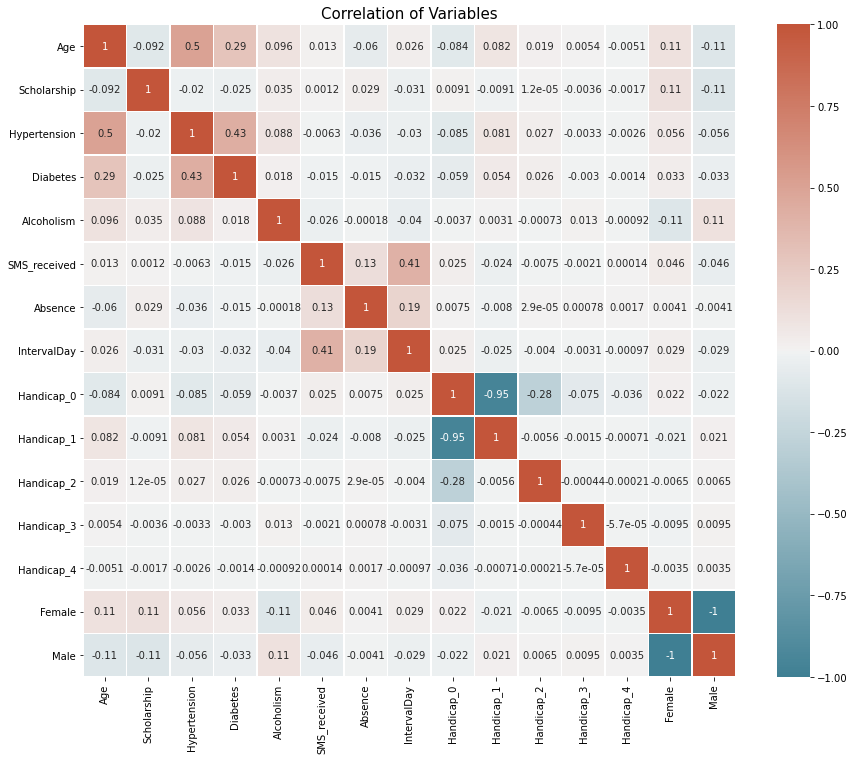

In [78]:
corr = df.corr()
fig, ax = plt.subplots(figsize=(15, 12))
cmap = sns.diverging_palette(220, 20, as_cmap=True, center='light')
sns.heatmap(corr, cmap=cmap, center=0, linewidths=.5, square=True, annot=True)
plt.title('Correlation of Variables', fontsize=15);

Consistent to our knowledge, there are positive correlations among `Age`, `Hypertension`, `Diabetes`.

Also, there is a positive correlation between `IntervalDay` and `SMS_received`. Patients have longer intervals are more likely to receive SMS reminders.

Let's figure out their relationship by further analysis: **Logistic regression model**

<a id='question1'></a>
### Identify the variables used to predict the patient absence

Before generating the model, check collinearity by calculating the VIFs for each variable in the Logistic regression model

In [79]:
df['intercept']=1
y, x = dmatrices('Absence ~ intercept + Age + Scholarship + Hypertension + Diabetes + Alcoholism + SMS_received + IntervalDay + Handicap_1 + Handicap_2 + Handicap_3 + Handicap_4 + Female', df, return_type='dataframe')
vif = pd.DataFrame()
vif['VIF Factor'] = [variance_inflation_factor(x.values, i) for i in range(x.shape[1])]
vif['features'] = x.columns

/Users/baiyanren/opt/anaconda3/envs/py38/lib/python3.8/site-packages/statsmodels/regression/linear_model.py:1715: RuntimeWarning: divide by zero encountered in double_scalars
  return 1 - self.ssr/self.centered_tss


In [80]:
vif

,VIF Factor,features
0,0.000000,Intercept
1,0.000000,intercept
2,1.395768,Age
3,1.030328,Scholarship
4,1.534059,Hypertension
5,1.244648,Diabetes
6,1.031653,Alcoholism
7,1.204869,SMS_received
8,1.209402,IntervalDay
9,1.011087,Handicap_1


There is no VIF greater than 10, suggesting the absence of collinearity.

In [81]:
y=df['Absence']
x=df[['intercept', 'Age', 'Scholarship', 'Hypertension', 'Diabetes', 'Alcoholism', 'SMS_received', 'IntervalDay', 'Handicap_1', 'Handicap_2', 'Handicap_3', 'Handicap_4', 'Female']]
mod=sm.Logit(y, x)
result = mod.fit()
result.summary2()

Optimization terminated successfully.
         Current function value: 0.482077
         Iterations 6


<class 'statsmodels.iolib.summary2.Summary'>
"""
                          Results: Logit
==================================================================
Model:              Logit            Pseudo R-squared: 0.042      
Dependent Variable: Absence          AIC:              106585.3140
Date:               2020-12-22 17:44 BIC:              106710.2825
No. Observations:   110521           Log-Likelihood:   -53280.    
Df Model:           12               LL-Null:          -55595.    
Df Residuals:       110508           LLR p-value:      0.0000     
Converged:          1.0000           Scale:            1.0000     
No. Iterations:     6.0000                                        
-------------------------------------------------------------------
               Coef.   Std.Err.     z      P>|z|    [0.025   0.975]
-------------------------------------------------------------------
intercept     -1.5540    0.0184  -84.3944  0.0000  -1.5901  -1.5179
Age           -0.0078    0.0004  -19.5486  0.0000  -0.0086  -0.0070
Scholarship    0.2332    0.0248    9.4159  0.0000   0.1846   0.2817
Hypertension  -0.0209    0.0250   -0.8363  0.4030  -0.0698   0.0280
Diabetes       0.1265    0.0346    3.6591  0.0003   0.0588   0.1943
Alcoholism     0.2176    0.0452    4.8182  0.0000   0.1291   0.3062
SMS_received   0.3306    0.0169   19.5285  0.0000   0.2974   0.3637
IntervalDay    0.0251    0.0005   49.9965  0.0000   0.0242   0.0261
Handicap_1     0.0527    0.0599    0.8799  0.3789  -0.0646   0.1700
Handicap_2     0.1474    0.1880    0.7837  0.4332  -0.2212   0.5159
Handicap_3     0.4094    0.6694    0.6116  0.5408  -0.9026   1.7215
Handicap_4     0.6475    1.2504    0.5179  0.6045  -1.8032   3.0983
Female         0.0132    0.0165    0.7995  0.4240  -0.0191   0.0455
==================================================================

"""

In [82]:
interpre = {'Age': 1/np.exp(-0.0078), 
            'Scholarship': np.exp(0.2359), 
            'Diabetes': np.exp(0.1264), 
            'Alcoholism': np.exp(0.2134), 
            'SMS_received': np.exp(0.3311), 
            'IntervalDay': np.exp(0.0252)}
interpre

{'Age': 1.0078304992464702,
 'Scholarship': 1.2660476990665237,
 'Diabetes': 1.1347359719050119,
 'Alcoholism': 1.2378797041080705,
 'SMS_received': 1.3924990352494562,
 'IntervalDay': 1.0255202040562033}

**Based on the Logistic regression model, these variables explained below could be used to predict whether or not a patient be absent for the appointment:**
- For every one year decrease in age, a patient is 1.0078 more likely to be absent, holding all other variables constant.
- If a patient receive scholarship, he/she is 1.2660 more likely to be absent, holding all other variables constant.
- If a patient has diabetes, he/she is 1.1347 more likely to be absent, holding all other variables constant.
- If a patient has alcoholism, he/she is 1.2379 more likely to be absent, holding all other variables constant.
- If a patient receives SMS notification, he/she is 1.3925 more likely to be absent, holding all other variables constant.
- For every one day increase in interval day, a patient is 1.0255 more likely to be absent, holding all other variables constant.

<a id='question2'></a>
### On the population level, what are the effects of the variables identified in question 1 on the absence rate?

#### Age

In [83]:
df.groupby('Absence').Age.mean()

Absence
0    37.790504
1    34.317872
Name: Age, dtype: float64

In [84]:
df_absence = df.query('Absence == 1')
df_presence = df.query('Absence == 0')

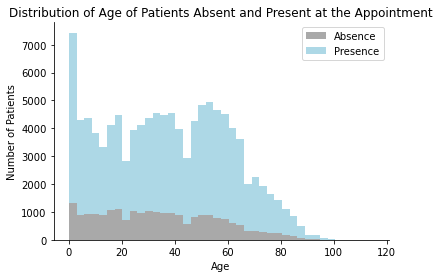

In [85]:
fig, ax = plt.subplots()
plt.hist([df_absence['Age'], df_presence['Age']], bins=40, label=['Absence', 'Presence'], color = ['darkgrey', 'lightblue'], stacked=True)
plt.title('Distribution of Age of Patients Absent and Present at the Appointment')
plt.ylabel('Number of Patients')
plt.xlabel('Age')
plt.legend()
sns.despine();

From these figures, I found that:

    - The average age of patients absent for the appointment is lower. 
    - The distribution of age of patients in both groups are similar. 
    - Very young kids (0-4 years old) showed lowest absence ratio.

To get a better sense of different absence ratio in different ages, I divided patients in four age groups: 
    - Kids (0~14 years old)
    - Youth (15~24 years old)
    - Adults (25~64 years old)
    - Seniors (65 years old and over)

In [86]:
Kids = df.query('Age <= 14')['Absence'].mean()
Youth = df.query('Age > 15 and Age <= 24')['Absence'].mean()
Adults = df.query('Age > 25 and Age <= 64')['Absence'].mean()
Seniors = df.query('Age > 65')['Absence'].mean()

/Users/baiyanren/opt/anaconda3/envs/py38/lib/python3.8/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


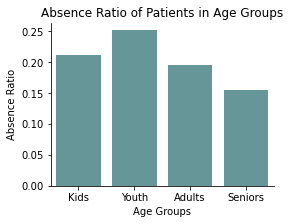

In [87]:
fig, ax = plt.subplots(figsize = (4, 3))
sns.despine()
heights = [Kids, Youth, Adults, Seniors]
labels = ['Kids', 'Youth', 'Adults', 'Seniors']
sns.barplot(labels, heights, color='cadetblue')
ax.set_xlabel('Age Groups')
ax.set_ylabel('Absence Ratio')
plt.title('Absence Ratio of Patients in Age Groups', fontsize=12);

The patients in the youth group (15~24 years old) showed highest absence ratio, while those in the seniors group (65 years old and over) showed lowest absence ratio.

#### Scholarship

In [88]:
Scholarship = df.groupby('Scholarship')['Absence'].mean()
Scholarship

Scholarship
0    0.198033
1    0.237363
Name: Absence, dtype: float64

#### Diabetes

In [89]:
Diabetes = df.groupby('Diabetes')['Absence'].mean()
Diabetes

Diabetes
0    0.203591
1    0.180033
Name: Absence, dtype: float64

#### Alcoholism

In [90]:
Alcoholism = df.groupby('Alcoholism')['Absence'].mean()
Alcoholism

Alcoholism
0    0.201911
1    0.201488
Name: Absence, dtype: float64

#### SMS notification

In [91]:
sms = df.groupby('SMS_received')['Absence'].mean()
sms

SMS_received
0    0.166980
1    0.275745
Name: Absence, dtype: float64

In [92]:
absence_rate = Scholarship.append(Diabetes).append(Alcoholism).append(sms)
absence_rate

0    0.198033
1    0.237363
0    0.203591
1    0.180033
0    0.201911
1    0.201488
0    0.166980
1    0.275745
Name: Absence, dtype: float64

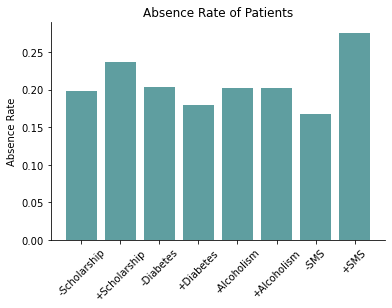

In [93]:
fig, ax = plt.subplots()
sns.despine()
xlabel=['-Scholarship', '+Scholarship', '-Diabetes', '+Diabetes', '-Alcoholism', '+Alcoholism', '-SMS', '+SMS']
plt.bar(x=xlabel, height=absence_rate, color='cadetblue')
plt.title('Absence Rate of Patients')
plt.ylabel('Absence Rate')
plt.xticks(rotation=45);

Based on the figure above, patients receiving SMS showed the highest absence rate. Patients with scholarship showed the second highest absence rate. 

#### Interval Day

In [94]:
interval=df.groupby('Absence')['IntervalDay'].mean()
interval

Absence
0     8.618375
1    15.602985
Name: IntervalDay, dtype: float64

Compared with patients who showed up, the `IntervalDay` of patients who are absent is much longer, almost double the length.

<a id='question3'></a>
### How does the model perform in predicting the patient absence?


In [95]:
Y = df['Absence']
X = df[['Age', 'Scholarship', 'Diabetes', 'Alcoholism', 'SMS_received', 'IntervalDay']]

X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2)

Random Forest Classification

In [96]:
clf = RandomForestClassifier(class_weight='balanced')

param_grid = {'n_estimators': [300, 400, 500],
              'max_depth': [10, 20, 30],
              'min_samples_split': [20, 10, 5]}

grid_search = GridSearchCV(clf, param_grid=param_grid)

In [98]:
rfc = RandomForestClassifier(class_weight='balanced', max_depth=30, min_samples_split=10, n_estimators=500)
rfc.fit(X_train, Y_train)
Y_pred = rfc.predict(X_test)

In [99]:
confusion_matrix(Y_test, Y_pred)

array([[12185,  5487],
       [ 1962,  2471]])

In [100]:
accuracy_score(Y_test, Y_pred)

0.6630174168740104

In [101]:
precision_score(Y_test, Y_pred)

0.31050515204825335

In [102]:
recall_score(Y_test, Y_pred)

0.55741033160388

<a id='conclusions'></a>
## Conclusions

In this project, I built a Random Forest Classification to predict the patient absence on medical appointment. It contains six independent variables: age, [Scholarship](https://en.wikipedia.org/wiki/Bolsa_Fam%C3%ADlia), Diabetes, Alcoholism, SMS notification, and interval days between schedule day and appointment day. These variables predict the patient absence in the accuracy of 0.7945.